In [1]:
import pandas as pd

#Import dataset
df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [2]:
#Drop extra things
df.drop(['Parents/Children Aboard','Name','Fare'],inplace=True,axis=1)
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0


In [3]:
#Easier way to change (another approach use 'sklearn.preprocessing.LabelEncoder')  #not recommended
#Change everything to numbers


df['Sex']=df['Sex'].map({
 'male':1,
 'female':0,
})
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard
0,0,3,1,22.0,1
1,1,1,0,38.0,1
2,1,3,0,26.0,0
3,1,1,0,35.0,1
4,0,3,1,35.0,0


In [4]:
#Making x and y axis 
#The X-axis will have TV,radio and newspaper values in it 
#The Y-axis will have sales values in it

X = df.drop(['Survived'], axis=1)
y = df['Survived']
print(X[:5])
print(y[:5])

   Pclass  Sex   Age  Siblings/Spouses Aboard
0       3    1  22.0                        1
1       1    0  38.0                        1
2       3    0  26.0                        0
3       1    0  35.0                        1
4       3    1  35.0                        0
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [8]:
#breaking our dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [9]:
#printing the details of our dataset after splitting 

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(709, 4)
(178, 4)
(709,)
(178,)


In [10]:
# Training the Naive Bayes model on the Training set


from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [11]:
y_pred = classifier.predict(x_test)
print('Predicted Value')
print(y_pred[:5])
print('Actual Value')
print(y_test[:5])

Predicted Value
[1 0 0 0 0]
Actual Value
14     0
158    0
762    0
740    1
482    0
Name: Survived, dtype: int64


/var/folders/kb/2qtwss7n3y3091dclgrcn9hm0000gn/T/ipykernel_28933/2381774008.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y_test[:5])


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score

acc = accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test)
print("Accuracy : ",acc,"\nF1 Score : ",f1)

Accuracy :  0.7808988764044944 
F1 Score :  0.6666666666666667


In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[100,  17],
       [ 22,  39]])

Text(58.222222222222214, 0.5, 'Truth')

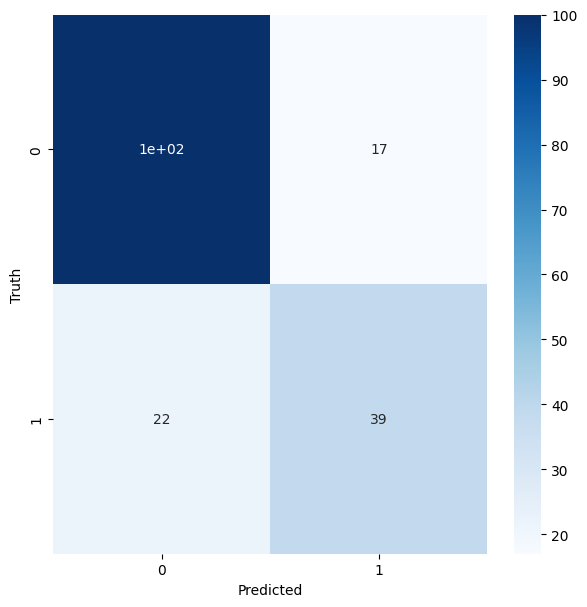

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')